# Implementing a Neural Network
In this exercise we will develop a neural network with fully-connected layers to perform classification, and test it out on the CIFAR-10 dataset.

In [1]:
# A bit of setup

import numpy as np
import matplotlib.pyplot as plt

from cs231n.classifiers.neural_net import TwoLayerNet

from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

We will use the class `TwoLayerNet` in the file `cs231n/classifiers/neural_net.py` to represent instances of our network. The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are numpy arrays. Below, we initialize toy data and a toy model that we will use to develop your implementation.

In [2]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

# Forward pass: compute scores
Open the file `cs231n/classifiers/neural_net.py` and look at the method `TwoLayerNet.loss`. This function is very similar to the loss functions you have written for the SVM and Softmax exercises: It takes the data and weights and computes the class scores, the loss, and the gradients on the parameters. 

Implement the first part of the forward pass which uses the weights and biases to compute the scores for all inputs.

In [3]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.6802720496109664e-08


# Forward pass: compute loss
In the same function, implement the second part that computes the data and regularizaion loss.

In [5]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133

# should be very small, we get < 1e-12
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Difference between your loss and correct loss:
1.7985612998927536e-13


# Backward pass
Implement the rest of the function. This will compute the gradient of the loss with respect to the variables `W1`, `b1`, `W2`, and `b2`. Now that you (hopefully!) have a correctly implemented forward pass, you can debug your backward pass using a numeric gradient check:

In [6]:
from cs231n.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.05)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

W2 max relative error: 3.440708e-09
b2 max relative error: 3.865091e-11
W1 max relative error: 3.561318e-09
b1 max relative error: 1.555471e-09


# Train the network
To train the network we will use stochastic gradient descent (SGD), similar to the SVM and Softmax classifiers. Look at the function `TwoLayerNet.train` and fill in the missing sections to implement the training procedure. This should be very similar to the training procedure you used for the SVM and Softmax classifiers. You will also have to implement `TwoLayerNet.predict`, as the training process periodically performs prediction to keep track of accuracy over time while the network trains.

Once you have implemented the method, run the code below to train a two-layer network on toy data. You should achieve a training loss less than 0.2.

Final training loss:  0.017149607938732093


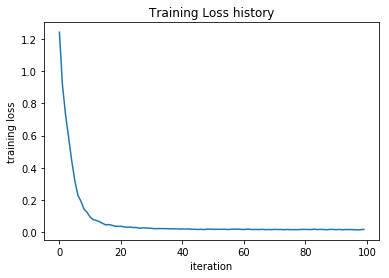

In [7]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Load the data
Now that you have implemented a two-layer network that passes gradient checks and works on toy data, it's time to load up our favorite CIFAR-10 data so we can use it to train a classifier on a real dataset.

In [8]:
from cs231n.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass

# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


# Train a network
To train our network we will use SGD. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

In [10]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)



iteration 0 / 1000: loss 2.302970
cover all samples :: loss:2.302970, train_acc:0.125000, val_acc:0.092000
iteration 100 / 1000: loss 2.302474
iteration 200 / 1000: loss 2.297076
cover all samples :: loss:2.289638, train_acc:0.170000, val_acc:0.163000
iteration 300 / 1000: loss 2.257328
iteration 400 / 1000: loss 2.230484
cover all samples :: loss:2.154140, train_acc:0.225000, val_acc:0.224000
iteration 500 / 1000: loss 2.150620
iteration 600 / 1000: loss 2.080736
iteration 700 / 1000: loss 2.054914
cover all samples :: loss:2.016839, train_acc:0.255000, val_acc:0.249000
iteration 800 / 1000: loss 1.979290
iteration 900 / 1000: loss 2.039101
cover all samples :: loss:2.093142, train_acc:0.245000, val_acc:0.284000
Validation accuracy:  0.287


# Debug the training
With the default parameters we provided above, you should get a validation accuracy of about 0.29 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

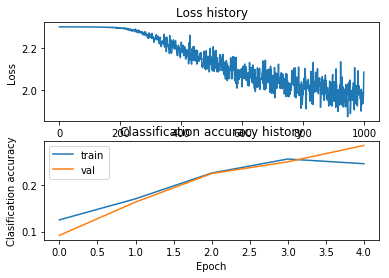

In [11]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.legend()
plt.show()

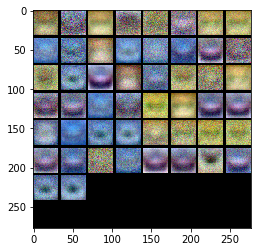

In [26]:
from cs231n.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    #plt.gca().axis('off')
    plt.show()

show_net_weights(net)

# Tune your hyperparameters

**What's wrong?**. Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength. You might also consider tuning the learning rate decay, but you should be able to get good performance using the default value.

**Approximate results**. You should be aim to achieve a classification accuracy of greater than 48% on the validation set. Our best network gets over 52% on the validation set.

**Experiment**: You goal in this exercise is to get as good of a result on CIFAR-10 as you can, with a fully-connected Neural Network. Feel free implement your own techniques (e.g. PCA to reduce dimensionality, or adding dropout, or adding features to the solver, etc.).

In [29]:
best_net = None # store the best model into this 

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################
# Your code

# 状态记录
best_val =  -1
best_states = None
results = {}
best_net = None

#  超参数
learning_rates = [5e-4, 1e-3, 5e-3]
regularization_strengths = [0.3, 0.4, 0.5, 0.6]
hidden_size_parms = [50, 60, 70]
iters = 2000

for lr in learning_rates:
    for rs in regularization_strengths:
        for hid_size in hidden_size_parms:
            # 初始化网络
            net = TwoLayerNet(input_size, hid_size, num_classes)
            #net = TwoLayerNet(input_size, hidden_size, num_classes)
            
            # train
            states = net.train(X_train, y_train, X_val, y_val,
                               num_iters=iters, batch_size=200,
                               learning_rate=lr, learning_rate_decay=0.95,
                               reg=rs, verbose=True)
            
            # predict
            y_train_pred = net.predict(X_train)
            acc_train = np.mean(y_train == y_train_pred)
            y_val_pred = net.predict(X_val)
            acc_val = np.mean(y_val == y_val_pred)
            
            # record
            results[(lr, rs, hid_size)] = (acc_train, acc_val)
            
            # record best
            if best_val < acc_val:
                best_states = states
                best_val = acc_val
                best_net = net
                
                


iteration 0 / 2000: loss 2.303066
cover all samples :: loss:2.303066, train_acc:0.090000, val_acc:0.106000
iteration 100 / 2000: loss 2.105671
iteration 200 / 2000: loss 2.041361
cover all samples :: loss:1.933376, train_acc:0.295000, val_acc:0.309000
iteration 300 / 2000: loss 1.912906
iteration 400 / 2000: loss 1.805092
cover all samples :: loss:1.636518, train_acc:0.450000, val_acc:0.394000
iteration 500 / 2000: loss 1.670958
iteration 600 / 2000: loss 1.814119
iteration 700 / 2000: loss 1.575755
cover all samples :: loss:1.646813, train_acc:0.505000, val_acc:0.435000
iteration 800 / 2000: loss 1.640337
iteration 900 / 2000: loss 1.557425
cover all samples :: loss:1.609998, train_acc:0.465000, val_acc:0.439000
iteration 1000 / 2000: loss 1.567516
iteration 1100 / 2000: loss 1.554971
iteration 1200 / 2000: loss 1.731159
cover all samples :: loss:1.653686, train_acc:0.415000, val_acc:0.452000
iteration 1300 / 2000: loss 1.527066
iteration 1400 / 2000: loss 1.586293
cover all samples :

iteration 1900 / 2000: loss 1.606158
cover all samples :: loss:1.560999, train_acc:0.510000, val_acc:0.460000
iteration 0 / 2000: loss 2.303355
cover all samples :: loss:2.303355, train_acc:0.145000, val_acc:0.134000
iteration 100 / 2000: loss 2.094218
iteration 200 / 2000: loss 1.966147
cover all samples :: loss:1.894648, train_acc:0.345000, val_acc:0.306000
iteration 300 / 2000: loss 1.865408
iteration 400 / 2000: loss 1.793266
cover all samples :: loss:1.738819, train_acc:0.465000, val_acc:0.383000
iteration 500 / 2000: loss 1.871585
iteration 600 / 2000: loss 1.685021
iteration 700 / 2000: loss 1.716659
cover all samples :: loss:1.697305, train_acc:0.415000, val_acc:0.424000
iteration 800 / 2000: loss 1.663429
iteration 900 / 2000: loss 1.612520
cover all samples :: loss:1.601868, train_acc:0.500000, val_acc:0.444000
iteration 1000 / 2000: loss 1.572134
iteration 1100 / 2000: loss 1.603181
iteration 1200 / 2000: loss 1.588097
cover all samples :: loss:1.482377, train_acc:0.535000, 

iteration 1800 / 2000: loss 1.532534
iteration 1900 / 2000: loss 1.600899
cover all samples :: loss:1.548994, train_acc:0.545000, val_acc:0.473000
iteration 0 / 2000: loss 2.303051
cover all samples :: loss:2.303051, train_acc:0.170000, val_acc:0.124000
iteration 100 / 2000: loss 2.001131
iteration 200 / 2000: loss 1.804554
cover all samples :: loss:1.697984, train_acc:0.465000, val_acc:0.385000
iteration 300 / 2000: loss 1.697819
iteration 400 / 2000: loss 1.675283
cover all samples :: loss:1.640318, train_acc:0.450000, val_acc:0.447000
iteration 500 / 2000: loss 1.614888
iteration 600 / 2000: loss 1.523057
iteration 700 / 2000: loss 1.486834
cover all samples :: loss:1.482650, train_acc:0.530000, val_acc:0.461000
iteration 800 / 2000: loss 1.526023
iteration 900 / 2000: loss 1.525754
cover all samples :: loss:1.589363, train_acc:0.505000, val_acc:0.474000
iteration 1000 / 2000: loss 1.559750
iteration 1100 / 2000: loss 1.338894
iteration 1200 / 2000: loss 1.462467
cover all samples :

iteration 1700 / 2000: loss 1.424751
cover all samples :: loss:1.357337, train_acc:0.680000, val_acc:0.477000
iteration 1800 / 2000: loss 1.572794
iteration 1900 / 2000: loss 1.596919
cover all samples :: loss:1.582928, train_acc:0.585000, val_acc:0.494000
iteration 0 / 2000: loss 2.303359
cover all samples :: loss:2.303359, train_acc:0.160000, val_acc:0.135000
iteration 100 / 2000: loss 1.992110
iteration 200 / 2000: loss 1.883864
cover all samples :: loss:1.775068, train_acc:0.420000, val_acc:0.384000
iteration 300 / 2000: loss 1.597378
iteration 400 / 2000: loss 1.638091
cover all samples :: loss:1.683813, train_acc:0.480000, val_acc:0.428000
iteration 500 / 2000: loss 1.645791
iteration 600 / 2000: loss 1.646101
iteration 700 / 2000: loss 1.631893
cover all samples :: loss:1.552512, train_acc:0.570000, val_acc:0.450000
iteration 800 / 2000: loss 1.492655
iteration 900 / 2000: loss 1.598269
cover all samples :: loss:1.611432, train_acc:0.550000, val_acc:0.455000
iteration 1000 / 200

iteration 1500 / 2000: loss 1.489086
iteration 1600 / 2000: loss 1.509954
iteration 1700 / 2000: loss 1.468045
cover all samples :: loss:1.510515, train_acc:0.625000, val_acc:0.480000
iteration 1800 / 2000: loss 1.627156
iteration 1900 / 2000: loss 1.639019
cover all samples :: loss:1.521171, train_acc:0.550000, val_acc:0.482000
iteration 0 / 2000: loss 2.303028
cover all samples :: loss:2.303028, train_acc:0.210000, val_acc:0.149000


/home/g214-j/cs231camp/git_cs231_camp_orig/cs231n-camp/assignment/assignment1/cs231n/classifiers/neural_net.py:117: RuntimeWarning: divide by zero encountered in log
  loss = -np.log(scores[np.arange(N), y]).sum()


iteration 100 / 2000: loss inf
iteration 200 / 2000: loss inf
cover all samples :: loss:inf, train_acc:0.055000, val_acc:0.069000
iteration 300 / 2000: loss inf
iteration 400 / 2000: loss inf
cover all samples :: loss:inf, train_acc:0.045000, val_acc:0.087000
iteration 500 / 2000: loss inf
iteration 600 / 2000: loss inf
iteration 700 / 2000: loss inf
cover all samples :: loss:inf, train_acc:0.100000, val_acc:0.114000
iteration 800 / 2000: loss inf
iteration 900 / 2000: loss inf


/home/g214-j/cs231camp/git_cs231_camp_orig/cs231n-camp/assignment/assignment1/cs231n/classifiers/neural_net.py:112: RuntimeWarning: overflow encountered in subtract
  scores -= np.max(scores, axis=1, keepdims=True)
/home/g214-j/cs231camp/git_cs231_camp_orig/cs231n-camp/assignment/assignment1/cs231n/classifiers/neural_net.py:112: RuntimeWarning: invalid value encountered in subtract
  scores -= np.max(scores, axis=1, keepdims=True)
/home/g214-j/cs231camp/git_cs231_camp_orig/cs231n-camp/assignment/assignment1/cs231n/classifiers/neural_net.py:87: RuntimeWarning: invalid value encountered in greater
  s1_relu = (s1 > 0) * s1
/home/g214-j/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/g214-j/cs231camp/git_cs231_camp_orig/cs231n-camp/assignment/assignment1/cs231n/classifiers/neural_net.py:145: RuntimeWarning: invalid value encountered in greater
  ds1 = (s

cover all samples :: loss:nan, train_acc:0.110000, val_acc:0.087000
iteration 1000 / 2000: loss nan
iteration 1100 / 2000: loss nan
iteration 1200 / 2000: loss nan
cover all samples :: loss:nan, train_acc:0.060000, val_acc:0.087000
iteration 1300 / 2000: loss nan
iteration 1400 / 2000: loss nan
cover all samples :: loss:nan, train_acc:0.075000, val_acc:0.087000
iteration 1500 / 2000: loss nan
iteration 1600 / 2000: loss nan
iteration 1700 / 2000: loss nan
cover all samples :: loss:nan, train_acc:0.075000, val_acc:0.087000
iteration 1800 / 2000: loss nan
iteration 1900 / 2000: loss nan
cover all samples :: loss:nan, train_acc:0.110000, val_acc:0.087000
iteration 0 / 2000: loss 2.303105
cover all samples :: loss:2.303105, train_acc:0.265000, val_acc:0.153000
iteration 100 / 2000: loss inf
iteration 200 / 2000: loss inf
cover all samples :: loss:inf, train_acc:0.085000, val_acc:0.154000
iteration 300 / 2000: loss inf
iteration 400 / 2000: loss inf
cover all samples :: loss:inf, train_acc:

iteration 100 / 2000: loss inf
iteration 200 / 2000: loss inf
cover all samples :: loss:inf, train_acc:0.170000, val_acc:0.131000
iteration 300 / 2000: loss inf
iteration 400 / 2000: loss inf
cover all samples :: loss:inf, train_acc:0.120000, val_acc:0.088000
iteration 500 / 2000: loss inf
iteration 600 / 2000: loss inf
iteration 700 / 2000: loss inf
cover all samples :: loss:inf, train_acc:0.090000, val_acc:0.094000
iteration 800 / 2000: loss inf
iteration 900 / 2000: loss inf
cover all samples :: loss:inf, train_acc:0.115000, val_acc:0.113000
iteration 1000 / 2000: loss nan
iteration 1100 / 2000: loss nan
iteration 1200 / 2000: loss nan
cover all samples :: loss:nan, train_acc:0.120000, val_acc:0.087000
iteration 1300 / 2000: loss nan
iteration 1400 / 2000: loss nan
cover all samples :: loss:nan, train_acc:0.110000, val_acc:0.087000
iteration 1500 / 2000: loss nan
iteration 1600 / 2000: loss nan
iteration 1700 / 2000: loss nan
cover all samples :: loss:nan, train_acc:0.055000, val_ac

KeyError: (0.0005, 0.3)

In [30]:
# Print out results.
for lr, reg, hid_parm in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg, hid_parm)]
    print ("lr ",lr, "reg ", reg, "hidden_size  ",hid_parm, "train accuracy: ", train_accuracy, "val accuracy: ", val_accuracy)


print ("best validation accuracy achieved during cross-validation: ", best_val)



#################################################################################
#                               END OF YOUR CODE                                #
#################################################################################

lr  0.0005 reg  0.3 hidden_size   50 train accuracy:  0.4937755102040816 val accuracy:  0.478
lr  0.0005 reg  0.3 hidden_size   60 train accuracy:  0.49387755102040815 val accuracy:  0.469
lr  0.0005 reg  0.3 hidden_size   70 train accuracy:  0.5029795918367347 val accuracy:  0.485
lr  0.0005 reg  0.4 hidden_size   50 train accuracy:  0.4924081632653061 val accuracy:  0.483
lr  0.0005 reg  0.4 hidden_size   60 train accuracy:  0.4883877551020408 val accuracy:  0.46
lr  0.0005 reg  0.4 hidden_size   70 train accuracy:  0.49559183673469387 val accuracy:  0.471
lr  0.0005 reg  0.5 hidden_size   50 train accuracy:  0.48987755102040814 val accuracy:  0.462
lr  0.0005 reg  0.5 hidden_size   60 train accuracy:  0.4929795918367347 val accuracy:  0.477
lr  0.0005 reg  0.5 hidden_size   70 train accuracy:  0.49318367346938774 val accuracy:  0.477
lr  0.0005 reg  0.6 hidden_size   50 train accuracy:  0.48275510204081634 val accuracy:  0.462
lr  0.0005 reg  0.6 hidden_size   60 train accuracy:  0.

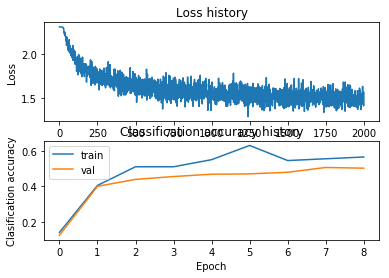

In [31]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(best_states['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(best_states['train_acc_history'], label='train')
plt.plot(best_states['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.legend()
plt.show()

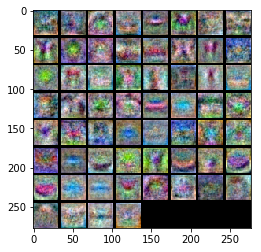

In [32]:
# visualize the weights of the best network
show_net_weights(best_net)

# Run on the test set
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 48%.

In [33]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.514


**Inline Question**

Now that you have trained a Neural Network classifier, you may find that your testing accuracy is much lower than the training accuracy. In what ways can we decrease this gap? Select all that apply.
1. Train on a larger dataset.
2. Add more hidden units.
3. Increase the regularization strength.
4. None of the above.

*Your answer*:
1,3

*Your explanation:*
说明对训练集过拟合了，说明模型太复杂了，所以解决办法是加大数据量或者增加正则化强度，以使得参数更具一般化来使得模型泛化更好